<a href="https://colab.research.google.com/github/jvac99/Machine_learning/blob/main/Trabalho02_Joao_Victor_Aquino_Correia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - Trabalho Prático 2 - Submissão até 11/07 (segunda) - Apresentação em 12/07 (terça)

##### Resolva um problema de Clusterização em um Jupyter Notebook e envie sua resolução (arquivo .ipynb + conjunto de dados).

* O conjunto de dados deve ter no mínimo 6 características (features) e 1000 amostras.

A seleção do conjunto de dados a ser usado deve ser preenchida na seguinte planilha, sendo que deve-se observar o não uso de um conjunto de dados já usado por outro aluno.

* Seleção de Conjuntos de Dados para Trabalho Prático 2 de Aprendizado de Máquina - 2022.1

A resolução deve conter:

* Importação dos dados
* Análise dos dados
* Pré-processamento
* Uso de técnicas de clusterização
* Usar k-Means, DBScan e Clusterização Hierárquica
* Avaliação dos resultados
* Avaliação dos resultados
* Apresentação dos resultados
* Apresentação do trabalho (obrigatório)

[Credit Card Dataset for Clustering ](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?select=CC+GENERAL.csv)

#### About Dataset

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [275]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import ward

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from sklearn.metrics import rand_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import calinski_harabasz_score

from sklearn.mixture import GaussianMixture

## Importação dos dados

In [185]:
df = pd.read_csv("CC GENERAL.csv")

In [186]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Análise dos dados

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [188]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [189]:
df.shape

(8950, 18)

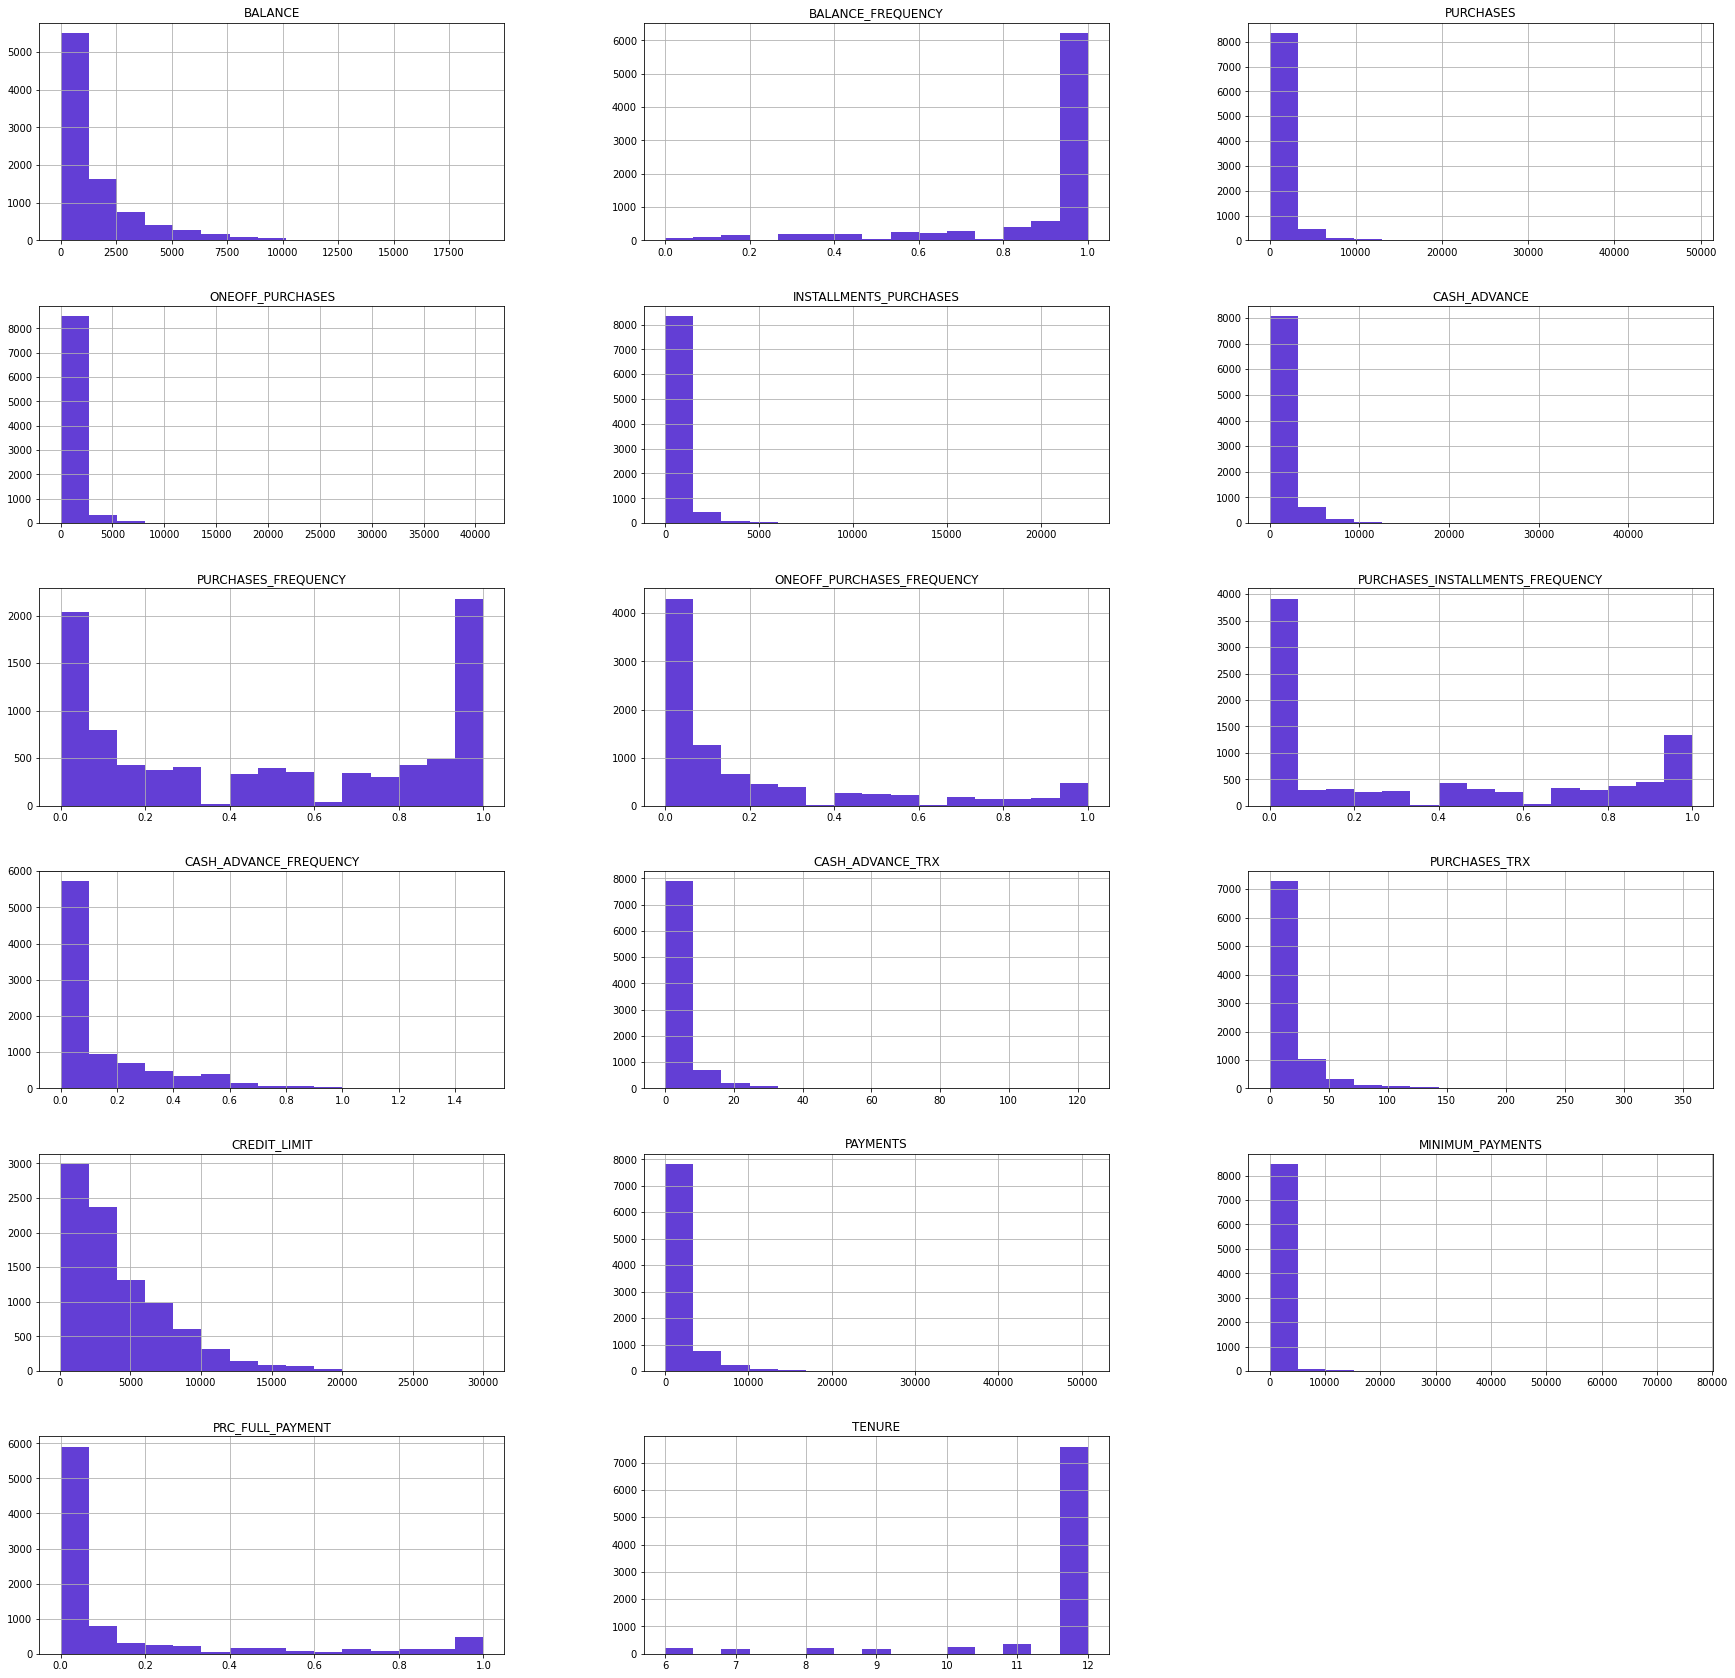

In [190]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']

df[numerical_features].hist(bins=15, figsize=(30, 30), layout=(6, 3), color='#633ed5');

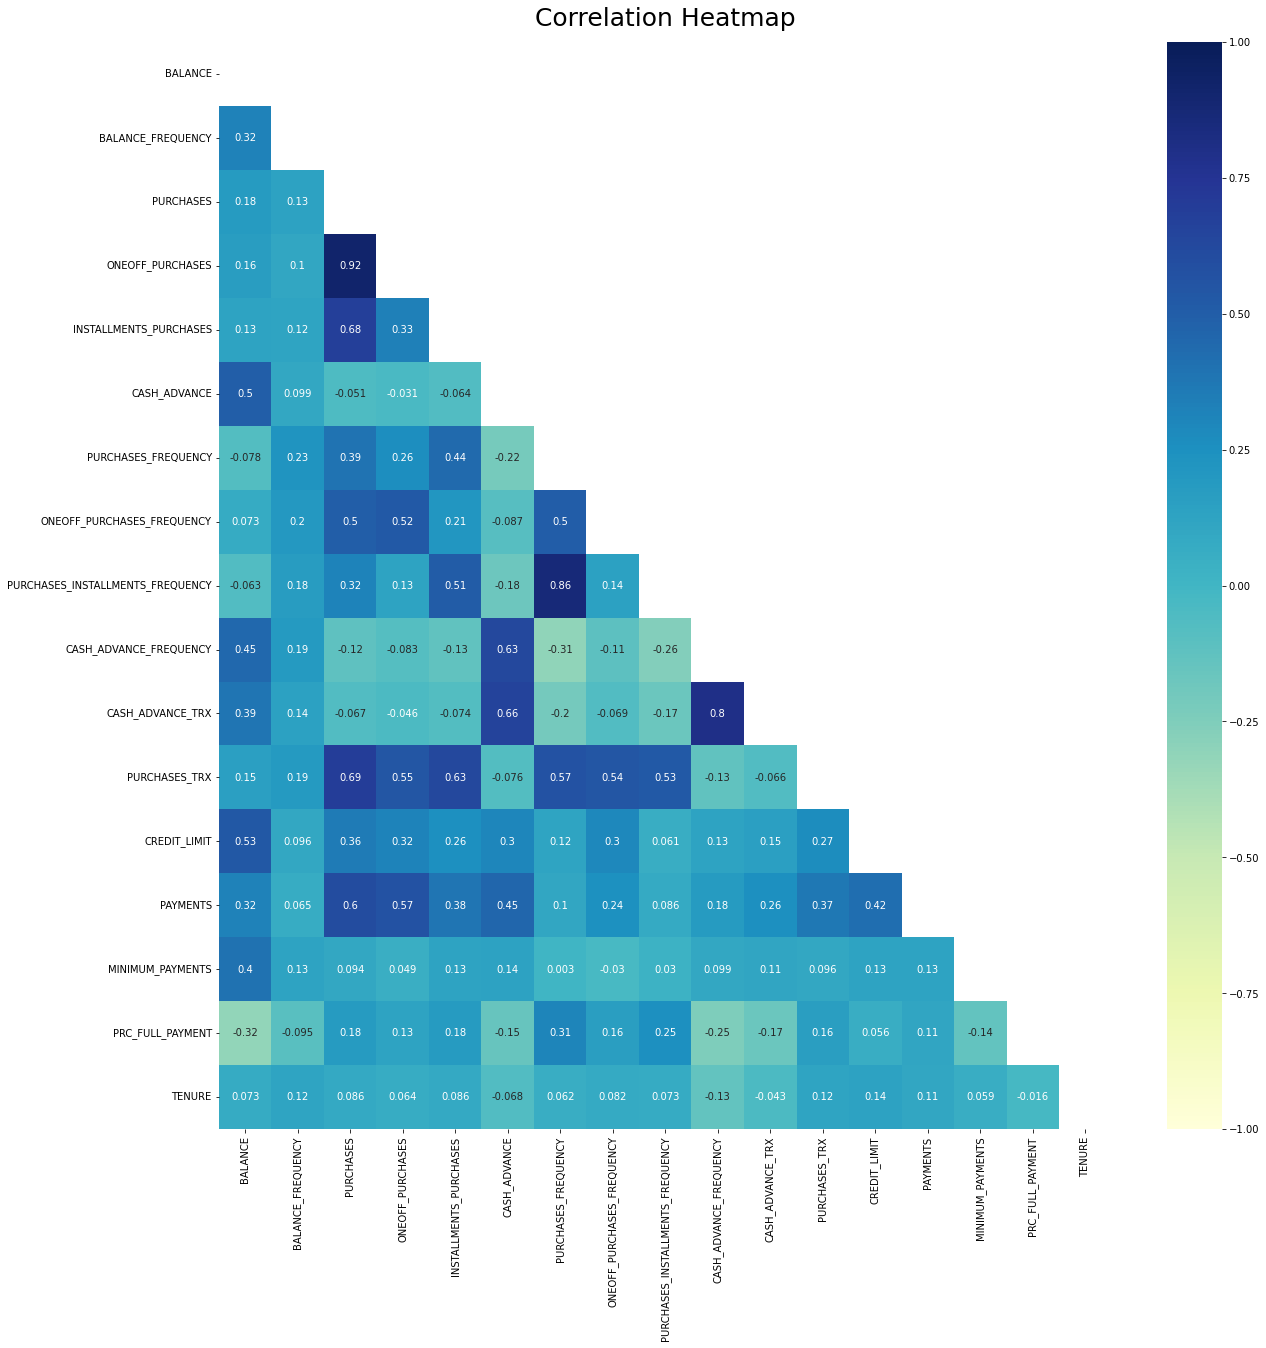

In [191]:
plt.subplots(figsize=(20,20))

corr = df.corr()
mask = np.triu(np.ones_like(corr))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=16);

## Pré-processamento


#### Tratando NAN

In [192]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [193]:
#df.dropna(inplace=True)
mean_credit_limit = df["CREDIT_LIMIT"].mean()
mean_minimum_payments = df["MINIMUM_PAYMENTS"].mean()
df["CREDIT_LIMIT"].fillna(mean_credit_limit, inplace=True)
df["MINIMUM_PAYMENTS"].fillna(mean_minimum_payments, inplace=True)

In [194]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [195]:
df['CUST_ID'].unique()

array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
      dtype=object)

#### Apagando dado categórico CUST_ID que não será muito útil

In [196]:
X = df.drop(columns=['CUST_ID']).to_numpy()
X

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

### Normalização

In [197]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

### Dividindo em conjunto de train e test

In [198]:
X_train, X_test = train_test_split(X_scaler,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7160, 17), (1790, 17))

In [199]:
X_train

array([[-6.71639242e-01, -4.19994104e-01, -2.33691192e-01, ...,
        -3.14993529e-01, -5.25550971e-01, -1.88104401e+00],
       [ 8.15198388e-01,  5.18083823e-01, -4.69551882e-01, ...,
         3.10769514e-01, -5.25550971e-01,  3.60679544e-01],
       [-4.97743434e-01,  5.18083823e-01, -4.69551882e-01, ...,
        -2.38004516e-01,  2.32361774e+00,  3.60679544e-01],
       ...,
       [-7.32303341e-01, -2.93575277e+00, -4.69551882e-01, ...,
        -3.41106970e-01,  2.89345285e+00,  3.60679544e-01],
       [-7.51639815e-01, -3.70327107e+00, -3.75997678e-01, ...,
         4.87830489e-17, -5.25550971e-01,  3.60679544e-01],
       [-4.95819770e-01,  5.18083823e-01,  1.05746729e+00, ...,
        -2.94857535e-01,  6.14115831e-01, -1.13380283e+00]])

In [200]:
X_test

array([[-0.7435516 , -1.78447531, -0.4625311 , ..., -0.33351677,
        -0.52555097, -0.38656164],
       [-0.49219098,  0.51808382, -0.1829965 , ..., -0.1906279 ,
        -0.52555097,  0.36067954],
       [-0.69435298,  0.51808382, -0.30913179, ..., -0.29994077,
        -0.52555097,  0.36067954],
       ...,
       [-0.74894625, -3.31951192, -0.41619397, ..., -0.3462442 ,
        -0.52555097,  0.36067954],
       [-0.74360332,  0.04904486, -0.38789556, ..., -0.32078594,
         0.61411583, -1.88104401],
       [ 1.45217872,  0.51808382, -0.31355956, ...,  0.34746532,
        -0.52555097,  0.36067954]])

## Uso de técnicas de clusterização

    classe sklearn.cluster. KMeans ( n_clusters = 8 , * , init = 'k-means++' , n_init = 10 , max_iter = 300 , tol = 0.0001 , verbose = 0 , random_state = None , copy_x = True , algoritmo = 'lloyd' )

### k-Means

In [304]:
# Lista de valores de n_clusters
kmeans_n_clusters_list = list(range(2, 22))
# Lista de inércias do Kmeans
kmenas_inertia_list = []
kmenas_silhouette_list = []
kmenas_davies_bouldin_list = []
# Lista de y_pred do Kmeans
df_y_pred_list = []


for i in kmeans_n_clusters_list:
    kmeans = KMeans(n_clusters=i, random_state=42)
    y_pred = kmeans.fit_predict(X)
    kmenas_inertia_list.append(kmeans.inertia_)
    kmenas_silhouette_list.append(silhouette_score(X, y_pred, metric='euclidean'))
    kmenas_davies_bouldin_list.append(davies_bouldin_score(X, y_pred))
    df_y_pred = df.copy()
    df_y_pred['labels'] = y_pred
    df_y_pred_list.append(df_y_pred)

### Métricas de avaliação de desempenho de clustering

https://www.analyticsvidhya.com/blog/2020/10/quick-guide-to-evaluation-metrics-for-supervised-and-unsupervised-machine-learning/

https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

#### O Método do Cotovelo

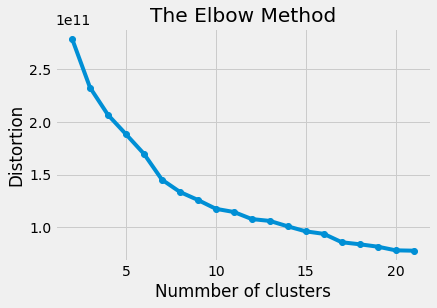

In [295]:
plt.plot(kmeans_n_clusters_list , kmenas_inertia_list, marker='o')
plt.title('The Elbow Method')
# Número de Clusters
plt.xlabel('Nummber of clusters')
# Distorção
plt.ylabel('Distortion')
plt.show()

#### O Método Silhueta

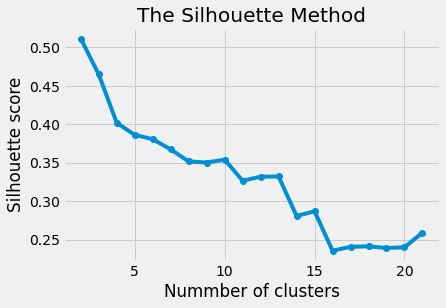

In [301]:
plt.plot(kmeans_n_clusters_list , kmenas_silhouette_list, marker='o')
plt.title('The Silhouette Method')
# Número de Clusters
plt.xlabel('Nummber of clusters')
# Distorção
plt.ylabel('Silhouette score')
plt.show()

#### Índice Dunn

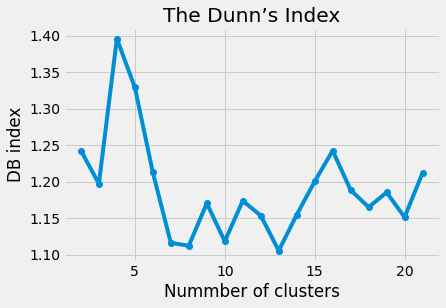

In [299]:
plt.plot(kmeans_n_clusters_list , kmenas_davies_bouldin_list, marker='o')
plt.title('The Dunn’s Index')
# Número de Clusters
plt.xlabel('Nummber of clusters')
# Distorção
plt.ylabel('DB index')
plt.show()

In [307]:
n = 6
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(X_train)
y_pred_train = kmeans.labels_
kmeans.fit(X_test)
y_pred_test = kmeans.labels_
kmeans.inertia_
y_pred

array([3, 0, 4, ..., 1, 1, 3], dtype=int32)

### DBScan

https://medium.com/analytics-vidhya/cluster-analysis-with-dbscan-density-based-spatial-clustering-of-applications-with-noise-6ade1ec23555

In [205]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [337]:
# Lista de valores de n_clusters
dbscan_min_samples_list = list(range(2, 11))
df_dbscan_y_pred_list = []


for i in dbscan_min_samples_list:
    dbscan = DBSCAN(eps=0.2,min_samples=i)
    clustering = dbscan.fit(X)
    y_pred = clustering.labels_
    df_y_pred = df.copy()
    df_y_pred['labels'] = y_pred
    df_dbscan_y_pred_list.append(df_y_pred)

In [336]:
df_dbscan_y_pred_list[4]['labels'].unique()

array([-1])

In [352]:
# Lista de valores de n_clusters
dbscan_min_samples_list = list(range(2, 11))
df_y_pred = {}
df_dbscan_y_pred_list = []


for i in dbscan_min_samples_list:
    dbscan = DBSCAN(eps=0.2,min_samples=i)
    clustering = dbscan.fit(X_train)
    y_pred = clustering.labels_
    name  = "labels_dbscan_min_samples_" + str(i)
    #df_y_pred[name] = 1
    #df_dbscan_y_pred_list.append(df_y_pred)

/tmp/ipykernel_5752/949215475.py:11: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  name = pd.concat("labels_dbscan_min_samples_", i)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "str"

In [330]:
dbscan = DBSCAN(eps=0.2,min_samples=6)
clustering = dbscan.fit(X_train)
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [217]:
dbscan2 = DBSCAN(eps=0.3,min_samples=6)
clustering = dbscan2.fit(X_train)
clustering.labels_
clustering

DBSCAN(eps=0.3, min_samples=6)

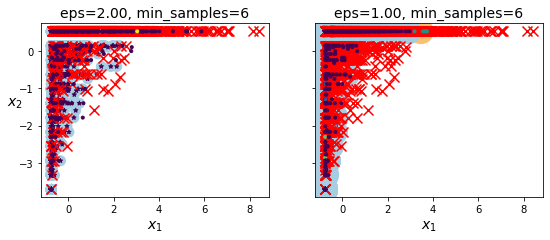

In [208]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X_train, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X_train, size=600, show_ylabels=False)

plt.show()

### Agglomerative Clustering

In [209]:
agg = AgglomerativeClustering(linkage="complete").fit(X_train)

In [210]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [211]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [212]:
agg.children_

array([[ 2779,  3188],
       [ 2157,  5705],
       [  104,  7109],
       ...,
       [ 4309, 14315],
       [14314, 14316],
       [14306, 14317]])

### Clusterização Hieráquica

In [213]:
#adding new columns for ward
agg_ward = AgglomerativeClustering(n_clusters=7, linkage='ward')
df['ward'] = agg_ward.fit_predict(X)

#adding new columns for average
agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
df['average'] = agg_average.fit_predict(X)

#adding new columns for complete
agg_complete = AgglomerativeClustering(n_clusters=7, linkage='complete')
df['complete'] = agg_complete.fit_predict(X)

#showing dataframe
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,ward,average,complete
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,3,1,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,2,1,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,864.206542,0.000000,12,2,1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,3,1,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,864.206542,0.000000,6,3,1,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,3,1,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,3,1,0


RecursionError: maximum recursion depth exceeded while getting the str of an object

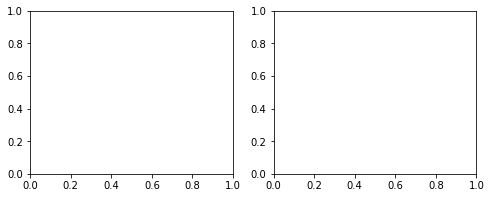

In [214]:
from scipy.cluster import hierarchy

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = dendrogram(Z, ax=axes[0], above_threshold_color='y',
                           orientation='top')
dn2 = dendrogram(Z, ax=axes[1],
                           above_threshold_color='#bcbddc',
                           orientation='right')
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

In [ ]:
Z = ward(X_train)
dn = dendrogram(Z)

Error in callback <function flush_figures at 0x7f82af5c67a0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
Z = linkage(X_train, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

RecursionError: maximum recursion depth exceeded while getting the str of an object

<Figure size 1800x720 with 0 Axes>

### Avaliação dos resultados


### Apresentação dos resultados

In [218]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

In [219]:
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)